In [1]:
#Developed in PyCharm with Python 3
#Using Kali Linux
#Chinmaya Joshi

#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics as stats
import math


In [2]:


def loadRawData(materialName,stateTIM,setTests):
    setTests = "Run"+ str(setTests)
    #rawData = np.loadtxt("TRTDataForPaper/PG/NoTIM/Run1/Test 139.lvm", delimiter= '\t', skiprows=23, encoding='windows-1252')
    datasetTRT = []

    for testData in sorted(os.listdir("TRTDataForPaper/"+materialName+"/"+stateTIM+"/"+setTests)):
        rawData = np.loadtxt("TRTDataForPaper/"+materialName+"/"+stateTIM+"/"+setTests+"/"+testData, delimiter= '\t', skiprows=23, encoding='windows-1252')
        rawData = pd.DataFrame(rawData)
        datasetTRT.append(rawData)

    return datasetTRT, materialName

In [3]:
setOfTests = [1,2,3]

#loadedRawData1 = loadRawData("TiG2", "NoTIM", 1)
#loadedRawData2 = loadRawData("TiG2", "NoTIM", 2)
loadedRawData3 = loadRawData("PG", "NoTIM", 3)

#data1 = loadedRawData1[0]
#data2 = loadedRawData2[0]
data3 = loadedRawData3[0]


In [4]:
def TRTDataLabel(datasetTRT):

    times = []
    H1s = []
    H2s = []
    H3s = []
    C3s = []
    C2s = []
    C1s = []

    for i in range(len(datasetTRT)):
        times.append(datasetTRT[i][0])
        H1s.append(datasetTRT[i][1])
        H2s.append(datasetTRT[i][2])
        H3s.append(datasetTRT[i][3])
        C3s.append(datasetTRT[i][4])
        C2s.append(datasetTRT[i][5])
        C1s.append(datasetTRT[i][6])

    return times, H1s, H2s, H3s, C3s, C2s, C1s



In [5]:

def plotForSteadyState(labelledData):

    for i in range(len(labelledData[0])):
        # Create figure with two subplots sharing x-axis
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1]})

        # Plot data on both subplots
        ax1.plot(labelledData[0][i], labelledData[1][i], label="T1", color="red") #Closest to Heater
        ax1.plot(labelledData[0][i], labelledData[2][i], label="T2", color = "orange")
        ax1.plot(labelledData[0][i], labelledData[3][i], label="T3", color = "yellow") #Closest to Hot Side on Sample

        ax2.plot(labelledData[0][i], labelledData[4][i], label="T4", color = "green") #Closest to Cold Side on Sample
        ax2.plot(labelledData[0][i], labelledData[5][i], label="T5", color = "pink")
        ax2.plot(labelledData[0][i], labelledData[6][i], label="T6", color = "blue") #Closest to Cold Plate

        # Set y-axis limits to create the break
        ax1.set_ylim(120, 170)   # Upper part of y-axis
        ax2.set_ylim(40, 60)     # Lower part of y-axis

        # Hide spines between broken axes
        ax1.spines['bottom'].set_visible(True)
        ax2.spines['top'].set_visible(True)

        # Add diagonal lines to indicate the break
        d = 0.015  # Size of diagonal lines
        kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
        ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

        kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

        # Add labels and legend
        ax1.set_ylabel("Temperature ($^{o}C$)")
        ax2.set_ylabel("Temperature ($^{o}C$)")
        ax2.set_xlabel("Time (s)")

        ax1.legend(fontsize=14)
        ax2.legend(fontsize=14)

        plt.suptitle("Sample Thickness: " + "3.15" + " mm")
        plt.subplots_adjust(hspace=0.1)  # Reduce space between subplots

        plt.show()

    return 0


In [6]:

def plotForSteadyState(labelledData):

    i = 8
    # Create figure with two subplots sharing x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1]})

    # Plot data on both subplots
    ax1.plot(labelledData[0][i], labelledData[1][i], label="T1", color="red") #Closest to Heater
    ax1.plot(labelledData[0][i], labelledData[2][i], label="T2", color = "orange")
    ax1.plot(labelledData[0][i], labelledData[3][i], label="T3", color = "yellow") #Closest to Hot Side on Sample

    ax2.plot(labelledData[0][i], labelledData[4][i], label="T4", color = "green") #Closest to Cold Side on Sample
    ax2.plot(labelledData[0][i], labelledData[5][i], label="T5", color = "pink")
    ax2.plot(labelledData[0][i], labelledData[6][i], label="T6", color = "blue") #Closest to Cold Plate

    # Set y-axis limits to create the break
    ax1.set_ylim(140, 165)   # Upper part of y-axis
    ax2.set_ylim(40, 60)     # Lower part of y-axis

    # Hide spines between broken axes
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # Add diagonal lines to indicate the break
    d = 0.015  # Size of diagonal lines
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

    # Add labels and legend
    fig.text(0.01, 0.5, "Temperature ($^{o}C$)", va="center", rotation="vertical", fontsize=14)
    ax2.set_xlabel("Time (s)", fontsize=14)

    ax1.axvline(x = 800, color="red", linestyle="--")
    ax2.axvline(x = 800, color="red", linestyle="--")



    ax1.tick_params(axis='y', labelsize=14)  # Change 14 to desired size
    ax2.tick_params(axis='y', labelsize=14)  # Change 14 to desired size
    ax2.tick_params(axis='x', labelsize=14)  # Change 14 to desired size
    ax1.tick_params(axis='x', which='both', length=0)  # Hide tick markers on top subplot


    ax1.legend(fontsize=10, loc = "lower center")
    ax2.legend(fontsize=10, loc = "lower center")

    plt.suptitle("Sample Thickness: " + "3.15" + " mm", fontsize=14)
    plt.subplots_adjust(hspace=0.2)  # Reduce space between subplots


    plt.show()

    return 0


In [7]:
#labelledData1 = TRTDataLabel(data1)
#labelledData2 = TRTDataLabel(data2)
labelledData3 = TRTDataLabel(data3)


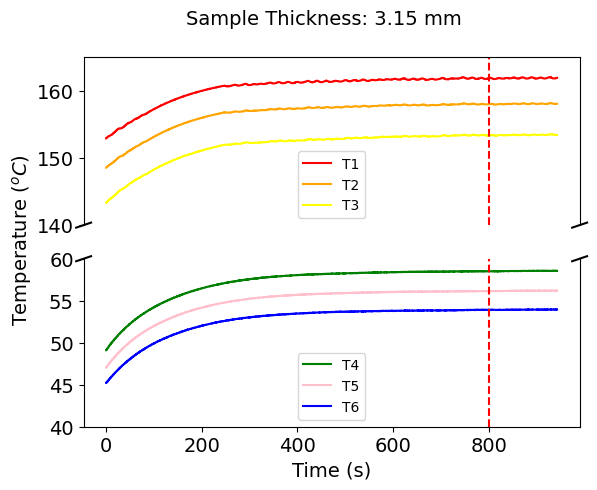

0

In [8]:
#plotForSteadyState(labelledData1)
#plotForSteadyState(labelledData2)
plotForSteadyState(labelledData3)


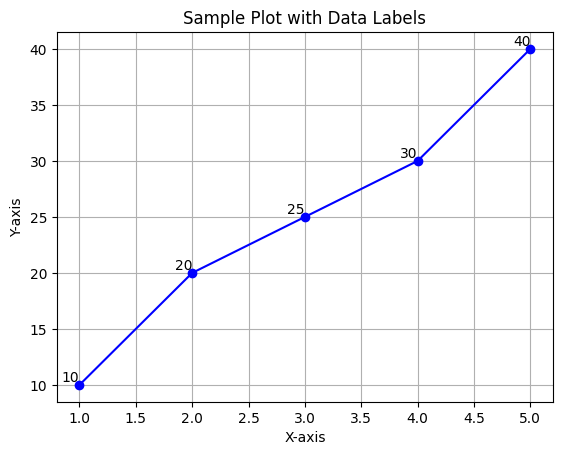

In [9]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

# Create a plot with markers
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Add data labels
for i, txt in enumerate(y):
    plt.text(x[i], y[i], str(txt), ha='right', va='bottom', fontsize=10)

# Show the plot
plt.title('Sample Plot with Data Labels')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()
